## LBVAR Asymmetry

Asymmetry LBVAR 모형에 대한 자세한 설명은 `manual/LBVAR Asymmetry.md` 참고.

### 데이터 불러오기: 미국 거시경제 변수, 자세한 변수 항목은 아래 `df.info()` 결과 참고.

In [1]:
import pandas as pd

In [3]:
# # large 데이터 로드
df = pd.read_excel("../data/Differed_Data.xlsx", index_col=0) ##

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2000-06-01 to 2023-12-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nominal_GDP          95 non-null     float64
 1   Nominal_GDI          95 non-null     float64
 2   Nominal_GNI          95 non-null     float64
 3   Private_Expenditure  95 non-null     float64
 4   Total_Fixed_Capital  95 non-null     float64
 5   I_Agriculture        95 non-null     float64
 6   I_Cultivation        95 non-null     float64
 7   I_Livestock          95 non-null     float64
 8   I_Forestry           95 non-null     float64
 9   I_Fishing            95 non-null     float64
dtypes: float64(10)
memory usage: 8.2 KB


,Nominal_GDP,Nominal_GDI,Nominal_GNI,Private_Expenditure,Total_Fixed_Capital,I_Agriculture,I_Cultivation,I_Livestock,I_Forestry,I_Fishing
Time,,,,,,,,,,
2000-06-01,1.502927,1.358106,1.696707,0.074624,0.336491,-0.594326,-3.403336,-30.766764,9.261067,4.133994
2000-09-01,2.358037,1.387265,1.923136,0.959201,0.143881,0.869401,3.912006,13.369825,-11.070223,-5.372553
2000-12-01,-1.238687,-4.506357,-1.016552,0.866758,-6.624512,-2.483600,-3.892810,-2.218035,-1.894769,-11.767584
2001-03-01,1.521727,1.537304,1.435378,1.147073,4.043769,-7.536891,-4.474478,7.593760,-3.121609,-7.231986
2001-06-01,1.370596,0.008295,1.651308,2.252884,-0.211147,9.271709,4.438595,-0.958753,3.393123,11.205949


`bok_da` 시계열분석 패키지 `ts`의 `lbvar` 모형 모듈에서 `LBVAR_Asymmetry` 클래스를 불러온 후, `model` 객체를 생성한다.

In [3]:
from bok_da.ts.lbvar import LBVAR_Asymmetry

model = LBVAR_Asymmetry(p=4, ndraws=10000, verbose=True, hyperparameter_opt="mcmc", optimization_method=0)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Hyperparameter Optimization: 2
  - Optimization Method: 0
  - Verbose: True


`model`의 `fit()` 메서드를 이용해 `LBVAR_Asymmetry` 모형을 추정한다.

In [4]:
model.fit(df)

> Optimizing objective function using scipy Optimization Method
> Optimized Hyperparameters are [2.1000e-02 0.0000e+00 9.5004e+01]
> Hyperparameter Optimization Start


Hyperparameter MCMC: 100%|██████████| 10000/10000 [02:49<00:00, 58.90it/s]


> Hyperparameter Optimization Clear
> Opt Hyperparameters are [2.0000e-02 1.0000e-03 9.4577e+01]
> Prior Making (Asymmetric)
> Posterior Draw (Asymmetric)


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


`Draw.variable_summary()` 메서드를 이용해 모형파라미터에 대한 요약정보를 확인할 수 있다.

In [5]:
model.Draw.variable_summary()

added | variable     | type    |   size(KB) | info
-------------------------------------------------------
    1 | theta_is     | ndarray |      0.188 | shape=(10,)
    2 | Sigma_i_sq   | ndarray |    781.375 | shape=(10000, 10)
    3 | A_matrix     | ndarray |      0.141 | shape=(10, 10, 10000)
    4 | Bet          | ndarray |  32031.391 | shape=(10, 41, 10000)
    5 | Sigma_struct | ndarray |   7812.641 | shape=(10, 10, 10000)
    6 | Sigma        | ndarray |   7812.641 | shape=(10, 10, 10000)


`model`의 `forecast()` 메서드를 이용해 변수별로 예측을 수행한다. 예측기간은 `forecast_period=` 인자로 설정할 수 있다.

In [6]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start


100%|██████████| 10000/10000 [00:00<00:00, 14314.33it/s]

[[ 0.69851405  0.27516388  0.64458872  0.49524789  0.92082839 -0.246886
  -1.37766607  7.37930509 -1.89792636  0.7883116 ]
 [ 0.7380889   0.20055872  0.81495867  0.60306526  0.76015747  0.52108736
   0.03250834  1.65506247  1.29765473 -1.79849196]
 [ 0.7527833   0.18358616  0.77128487  0.56782931  0.81703982 -0.03570206
   0.01605019 -0.60529127 -0.22956036  1.06610615]
 [ 0.76192253  0.22975963  0.78332142  0.66805724  0.80758311  0.13827986
   0.16139053 -2.06734911  0.07329862 -1.22346246]]


예측결과를 `print_forecast()`메서드를 이용해 plot한다.

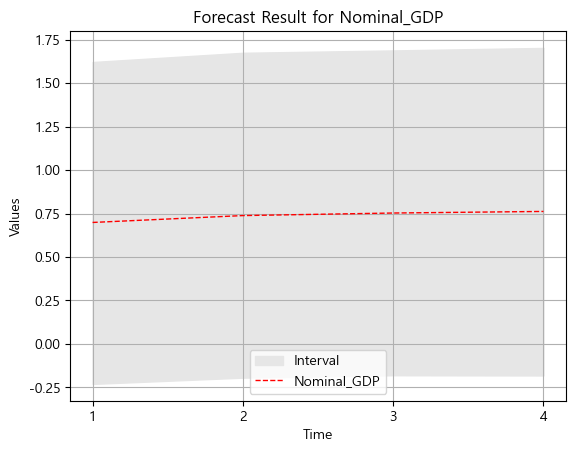

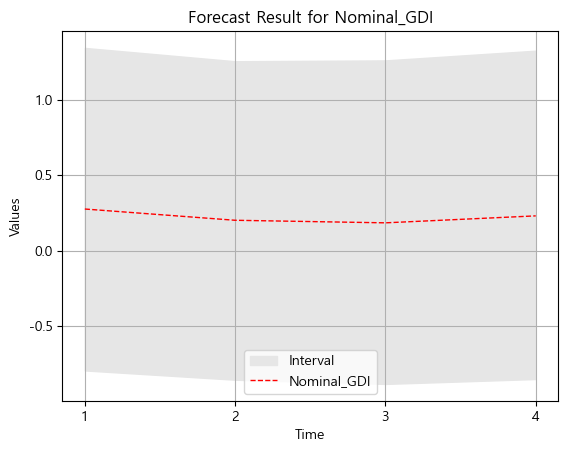

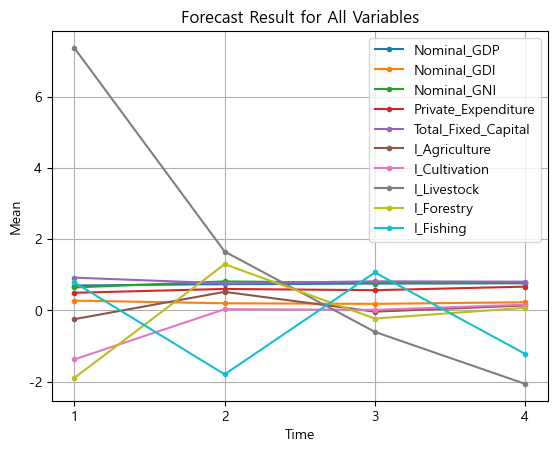

In [7]:
model.print_forecast(plot_index=[1, 2], column_names=df.columns)